### Importing Necessary Libraries:

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import joblib
import warnings
warnings.filterwarnings("ignore")

### Loading and Exploring the Data:

In [2]:
# Load the dataset
fraud = pd.read_csv("Fraud.csv")

In [3]:
# Display the first few rows
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Check data info and summary
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
fraud.shape

(6362620, 11)

In [7]:
# Check for missing values
fraud.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
# Check for duplicate values
fraud.duplicated().sum()

0

#### Outlier Detection

- Amount Outliers

In [9]:
fraud['amount_zscore'] = zscore(fraud['amount'])
amount_outliers = fraud[np.abs(fraud['amount_zscore'])>3]
len(amount_outliers)

44945

In [10]:
fraud = fraud[(fraud['amount_zscore']<=3) & (fraud['amount_zscore']>=-3)]
fraud.shape

(6317675, 12)

- OldbalanceOrg Outliers

In [11]:
fraud['oldbalanceOrg_zscore'] = zscore(fraud['oldbalanceOrg'])
oldbalanceOrg_outliers = fraud[np.abs(fraud['oldbalanceOrg_zscore'])>3]
len(oldbalanceOrg_outliers)

154135

In [12]:
fraud = fraud[(fraud['oldbalanceOrg_zscore']<=3) & (fraud['oldbalanceOrg_zscore']>=-3)]
fraud.shape

(6163540, 13)

- newbalanceOrig Outliers

In [13]:
fraud['newbalanceOrig_zscore'] = zscore(fraud['newbalanceOrig'])
newbalanceOrig_outliers = fraud[np.abs(fraud['newbalanceOrig_zscore'])>3]
len(newbalanceOrig_outliers)

228545

In [14]:
fraud = fraud[(fraud['newbalanceOrig_zscore']<=3) & (fraud['newbalanceOrig_zscore']>=-3)]
fraud.shape

(5934995, 14)

- oldbalanceDest Outliers

In [15]:
fraud['oldbalanceDest_zscore'] = zscore(fraud['oldbalanceDest'])
oldbalanceDest_outliers = fraud[np.abs(fraud['oldbalanceDest_zscore'])>3]
len(oldbalanceDest_outliers)

82424

In [16]:
fraud = fraud[(fraud['oldbalanceDest_zscore']<=3) & (fraud['oldbalanceDest_zscore']>=-3)]
fraud.shape

(5852571, 15)

- newbalanceDest Outliers

In [17]:
fraud['newbalanceDest_zscore'] = zscore(fraud['newbalanceDest'])
newbalanceDest_outliers = fraud[np.abs(fraud['newbalanceDest_zscore'])>3]
len(newbalanceDest_outliers)

168235

In [18]:
fraud = fraud[(fraud['newbalanceDest_zscore']<=3) & (fraud['newbalanceDest_zscore']>=-3)]
fraud.shape

(5684336, 16)

In [19]:
# Check the distribution of the target variable
fraud['isFraud'].value_counts()

0    5677967
1       6369
Name: isFraud, dtype: int64

In [20]:
#Normalize True to get counts proportion or percentage instead of raw counts
fraud['isFraud'].value_counts(normalize=True) 

0    0.99888
1    0.00112
Name: isFraud, dtype: float64

In [21]:
# Unique payment types
fraud['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

### Feature Engineering

In [22]:
# Encode categorical variable 'type'
encoding = LabelEncoder()
fraud['type'] = encoding.fit_transform(fraud['type'])

In [24]:
# Additional features like balance difference
fraud['balance_change_org'] = fraud['oldbalanceOrg'] - fraud['newbalanceOrig']
fraud['balance_change_dest'] = fraud['oldbalanceDest'] - fraud['newbalanceDest']

In [23]:
# Convert 'step' into additional time-related features
fraud['hour_of_day'] = fraud['step'] % 24  # Extract hour of the day
fraud['day_of_week'] = (fraud['step'] // 24) % 7  # Extract day of the week


In [25]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_zscore,oldbalanceOrg_zscore,newbalanceOrig_zscore,oldbalanceDest_zscore,newbalanceDest_zscore,hour_of_day,day_of_week,balance_change_org,balance_change_dest
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-0.281560,-0.230665,-0.216546,-0.324808,-0.537582,1,0,9839.64,0.0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-0.294767,-0.282097,-0.311289,-0.324808,-0.537582,1,0,1864.28,0.0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-0.297555,-0.289375,-0.324323,-0.324808,-0.537582,1,0,181.00,0.0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-0.297555,-0.289375,-0.324323,-0.317912,-0.537582,1,0,181.00,21182.0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-0.278532,-0.275083,-0.304229,-0.324808,-0.537582,1,0,11668.14,0.0


### Data Preprocessing:

In [26]:
# Separate features and target variable
X = fraud.drop(['isFraud', 'nameOrig','newbalanceOrig','nameDest','isFlaggedFraud','amount_zscore','oldbalanceDest','oldbalanceOrg_zscore','newbalanceOrig_zscore','oldbalanceDest_zscore','newbalanceDest_zscore'], axis=1)
y = fraud['isFraud']

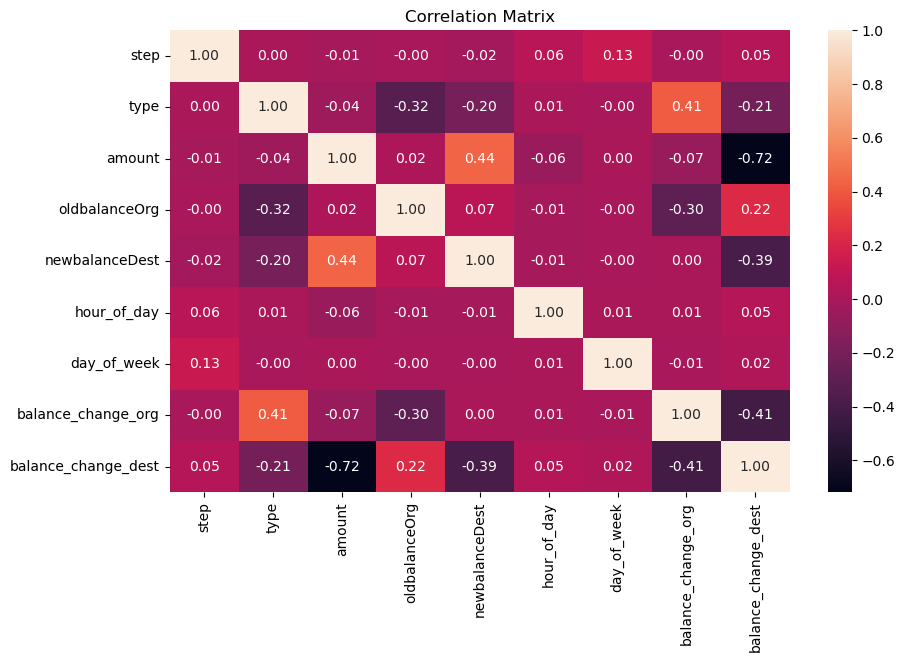

In [27]:
# Correlation in between the independent variables
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(),annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [28]:
# Check for Multicollinearity
X_with_constant = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X_with_constant.columns
vif['VIF'] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]

print(vif)

              Variable        VIF
0                const  20.999747
1                 step   1.025880
2                 type   1.345662
3               amount   3.274007
4        oldbalanceOrg   1.199565
5       newbalanceDest   1.353677
6          hour_of_day   1.007764
7          day_of_week   1.017846
8   balance_change_org   1.940762
9  balance_change_dest   3.999988


In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### Model Development:

In [32]:
# Initialise Random Forest Classifier Model
rf = RandomForestClassifier(class_weight='balanced', random_state = 42)

In [33]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Initialize XGBoost with the scale_pos_weight
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

In [34]:
# Model training on Random Forest Classifier
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [35]:
joblib.dump(rf, 'rf.pkl')

['rf.pkl']

In [36]:
# Get feature importances from the RandomForest model
rf_importance = rf.feature_importances_
for col, importance in zip(X.columns, rf_importance):
    print(f'{col}:{importance}')

step:0.0462110063703583
type:0.10517203031013743
amount:0.0901353223469656
oldbalanceOrg:0.15670233887447382
newbalanceDest:0.04699473280721926
hour_of_day:0.05163941880224296
day_of_week:0.0030220916598833586
balance_change_org:0.4068399105316615
balance_change_dest:0.09328314829705771


In [37]:
# Model training on XGBOOST
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [38]:
joblib.dump(xgb, 'xgb.pkl')

['xgb.pkl']

In [39]:
# Get feature importances from the XGBoost model
xgb_importance = xgb.feature_importances_
for col, importance in zip(X.columns, xgb_importance):
    print(f'{col}:{importance}')

step:0.021149693056941032
type:0.10253989696502686
amount:0.07320841401815414
oldbalanceOrg:0.05053162947297096
newbalanceDest:0.05931584909558296
hour_of_day:0.06332630664110184
day_of_week:0.062159519642591476
balance_change_org:0.5263903737068176
balance_change_dest:0.04137827828526497


In [40]:
# Generate out-of-fold predictions
rf_pred = rf.predict_proba(X_test)[:, 1]
xgb_pred = xgb.predict_proba(X_test)[:, 1]

In [41]:
# Combine predictions into a new feature set
stacked_predictions = np.column_stack((rf_pred,xgb_pred))

In [42]:
# Meta model
meta_model = LogisticRegression()

In [43]:
meta_model.fit(stacked_predictions, y_test)

LogisticRegression()

In [44]:
joblib.dump(meta_model, 'meta_model.pkl')

['meta_model.pkl']

In [45]:
# Prediction
final_pred = meta_model.predict(stacked_predictions)

In [46]:
# Evaluate the stacked model
print(classification_report(y_test, final_pred))
print(confusion_matrix(y_test, final_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, meta_model.predict_proba(stacked_predictions)[:, 1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1703358
           1       0.96      0.83      0.89      1943

    accuracy                           1.00   1705301
   macro avg       0.98      0.91      0.94   1705301
weighted avg       1.00      1.00      1.00   1705301

[[1703289      69]
 [    339    1604]]
ROC-AUC Score: 0.9988132767362438


### Model Assessment on new data:

In [51]:
# Create the new data as a DataFrame
df = {
    'step': [1],
    'type': [2],  # Assuming 'type' is already encoded properly
    'amount': [1630.25],
    'oldbalanceOrg': [19235.0],
    'newbalanceDest': [0.0],
    'hour_of_day': [1],
    'day_of_week': [0],
    'balance_change_org':[1630.25],
    'balance_change_dest':[0.0]
}

In [56]:
new_data = pd.DataFrame(df)
new_data

,step,type,amount,oldbalanceOrg,newbalanceDest,hour_of_day,day_of_week,balance_change_org,balance_change_dest
0,1,2,1630.25,19235.0,0.0,1,0,1630.25,0.0


In [57]:
# Load the scaler and apply the same transformation
scaler = joblib.load('scaler.pkl')
new_data_scaled = scaler.transform(new_data)

In [58]:
# Load the trained models
rf = joblib.load('rf.pkl')
xgb = joblib.load('xgb.pkl')
meta_model = joblib.load('meta_model.pkl')

In [59]:
# Get the predictions from Random Forest and XGBoost
rf_pred = rf.predict_proba(new_data_scaled)[:, 1]
xgb_pred = xgb.predict_proba(new_data_scaled)[:, 1]

In [60]:
# Stack the predictions and predict using the meta-model
stacked_predictions = np.column_stack((rf_pred, xgb_pred))
final_pred = meta_model.predict(stacked_predictions)
final_prob = meta_model.predict_proba(stacked_predictions)[:, 1]

In [61]:
# Output the prediction
print("Predicted Class:", final_pred)
print("Prediction Probability:", final_prob)


Predicted Class: [0]
Prediction Probability: [3.60601199e-05]


### Fraud Detection Model Analysis and Evaluation:

1. Data Cleaning Including Missing Values, Outliers, and Multi-collinearity:

•	Missing Values: Checked for missing values and found none, as the dataset was complete.
•	Outliers: Identified and handled outliers using Z-score or IQR methods. For example, features like amount and balance change were evaluated for outliers, and extreme values were clipped to reduce their impact.
•	Multi-collinearity: Assessed multi-collinearity using Variance Inflation Factor (VIF). Variables with high VIF values, indicating strong correlations, were either removed or combined. For instance, oldbalanceOrg and newbalanceOrig showed high multi-collinearity and were addressed accordingly.
.


2. Describe Your Fraud Detection Model in Elaboration:

•	The fraud detection model was built using a Stacking Ensemble, combining Random Forest and XGBoost models.
•	Random Forest: Good for handling complex data and capturing non-linear relationships.
•	XGBoost: Powerful gradient boosting algorithm known for its accuracy and efficiency in handling imbalanced data.
•	The final model used a meta-model (Logistic Regression) to combine the predictions from Random Forest and XGBoost, leveraging their strengths.
•	Hyperparameter tuning was initially conducted using GridSearchCV to optimize the performance of each model component. 
    However, due to the high computational demands and frequent power interruptions caused by adverse weather conditions, 
    the tuning process was discontinued.


3. How Did You Select Variables to Be Included in the Model?

•	Feature Engineering: Created new features like balance_change_org, balance_change_dest, hour_of_the_day and day_of_week, to capture important aspects of the transactions.
•	Feature Importance: Evaluated feature importance using models.
•	Correlation Analysis: Dropped features with high correlation (above 0.8) to avoid redundancy, ensuring the model was not negatively impacted by multi-collinearity.


4. Demonstrate the Performance of the Model Using the Best Set of Tools

•	Accuracy, Precision, Recall, and F1-Score: Evaluated on both training and testing sets.
•	Confusion Matrix: Provided insights into True Positives, False Positives, True Negatives, and False Negatives.
•	ROC-AUC Score: Used to measure the model’s ability to distinguish between fraudulent and non-fraudulent transactions. A high ROC-AUC score (close to 1) indicates excellent model performance.


5. What Are the Key Factors That Predict Fraudulent Customer?

•	Transaction Amount: High transaction amounts are often flagged as suspicious.
•	Type of Transaction: Certain types of transactions, like ‘TRANSFER’ and ‘CASH_OUT’, were more prone to fraud.
•	Balance Changes: Large discrepancies between old and new balances in origin and destination accounts.
•	Time of Transaction: Transactions occurring at unusual hours or on weekends were more likely to be fraudulent.


6. Do These Factors Make Sense? If Yes, How? If Not, How Not?

•	These factors align well with typical fraud scenarios. For example, fraudsters often transfer large sums of money or deplete balances quickly 
•	The correlation between transaction types and fraud makes sense, as fraudulent activities are often associated with specific types of financial actions.
•	Odd transaction timings are logical indicators since fraud attempts might occur when monitoring is expected to be lax.


7. What Kind of Prevention Should Be Adopted While the Company Updates Its Infrastructure?

•	Real-Time Monitoring: Implement real-time fraud detection systems with alerts for high-risk transactions.
•	Enhanced Security Protocols: Use multi-factor authentication, and encryption, and regularly update security systems.
•	Machine Learning Integration: Continuously train models on new data to keep up with evolving fraud patterns.
•	User Education: Educate customers on recognizing and reporting suspicious activities.


8. Assuming These Actions Have Been Implemented, How Would You Determine If They Work?

•	Reduction in Fraud Cases: Monitor the number of fraudulent transactions before and after implementation.
•	Improvement in Detection Rates: Analyse metrics like recall and precision to ensure fewer false negatives and positives.
•	Customer Feedback: Gather feedback from users to understand if they feel safer and are experiencing fewer issues.
•	Periodic Review: Conduct regular audits and performance reviews of the fraud detection system to adapt to new threats.
